# 1. Introduction

In the last mission, we computed summary statistics across columns with SQL. In many cases, though, we want to drill down even more and compute summary statistics per group to answer questions like:

* What is the total number of graduates by major category?
* What major category pays better?
* How does the sample size vary by major category?

# 2. If/Then in SQL

It is very common to want to create new columns according to rules based on other columns. For example, in order to quickly identify what are the top 10 majors (as per the rank column), we may want to create a column that indicates whether the value on rank for each row is greater than 10 or not.

## TODO:
* Write a SQL query that displays, with the alias Sample_category, the column whose values are given by the following rules:

  * Small if Sample_size is smaller than 200
  * Medium if Sample_size is equal to or higher than 200, and smaller than 1000
  * Large if Sample_size is equal to or higher than 1000

In [1]:
%load_ext sql

In [2]:
%sql sqlite:///jobs.db

In [3]:
%%sql

SELECT 
     CASE
     WHEN Sample_size<200 THEN 'Small'
     WHEN Sample_size<1000 THEN 'Medium'
     ELSE 'Large'
     END AS Sample_category
FROM recent_grads

 * sqlite:///jobs.db
Done.


Sample_category
Small
Small
Small
Small
Medium
Small
Small
Small
Large
Medium


# 3. Dissecting CASE

<block><pre>
CASE
WHEN `<condition_1> THEN <value_1>`
WHEN `<condition_2> THEN <value_2>`
ELSE `<value_3>`
END AS `<new_column_name>`
<block></pre>

**Note the following:**

* It starts with CASE to indicate that we'll be creating values by cases.
* It ends with END to indicate where the CASE clause terminates.
* Each explicit case is signaled by the reserved word WHEN.
* The value for each case is given after the reserved word THEN
* There is a fallback value given by the reserved word ELSE.

Here are some very important observations:

* Whatever you can use in WHERE for filtering, you can also use in place of the conditions above.
* There can be one or more WHEN lines. We exemplified with three, but it works just with one, two or, for instance, ten.
* The ELSE line is optional — without it, rows that don't match any WHEN will be set with a missing value (NULL).

## TODO:
* Write a SQL query that displays in order Major, Sample_size and a column named Sample_category, whose values are defined by the following rules:

  * Small if Sample_size is smaller than 200
  * Medium if Sample_size is equal to or higher than 200, and smaller than 1000
  * Large if Sample_size is equal to or higher than 1000

In [4]:
%%sql

SELECT Major,Sample_size,
       CASE 
       WHEN Sample_size<200 THEN 'Small'
       WHEN Sample_size<100 THEN 'Medium'
       ELSE 'Large'
       END AS 'Sample_category'
FROM recent_grads

 * sqlite:///jobs.db
Done.


Major,Sample_size,Sample_category
PETROLEUM ENGINEERING,36,Small
MINING AND MINERAL ENGINEERING,7,Small
METALLURGICAL ENGINEERING,3,Small
NAVAL ARCHITECTURE AND MARINE ENGINEERING,16,Small
CHEMICAL ENGINEERING,289,Large
NUCLEAR ENGINEERING,17,Small
ACTUARIAL SCIENCE,51,Small
ASTRONOMY AND ASTROPHYSICS,10,Small
MECHANICAL ENGINEERING,1029,Large
ELECTRICAL ENGINEERING,631,Large


# 4. Calculating Group-Level Summary Statistics

By group we mean any of the unique values in a column. Typically group statistics are calculated only for columns in which the values represent categories (as opposed to measurements of some sort — like age, currency, and so on).

**The GROUP BY SQL statement** allows us to compute summary statistics by group. When we use this statement, SQL creates a group for each unique value in a column or set of columns (the same values we get when we use the DISTINCT statement), and then does the calculations for them.

## TODO:
* Write a SQL query that, for each major category, displays:

  * The major category
  * The total number of graduates for Major_category with the alias Total_graduates

In [5]:
%%sql

SELECT Major_category, SUM(Total) AS Total_graduates
  FROM recent_grads
 GROUP BY Major_category;

 * sqlite:///jobs.db
Done.


Major_category,Total_graduates
Agriculture & Natural Resources,79981
Arts,357130
Biology & Life Science,453862
Business,1302376
Communications & Journalism,392601
Computers & Mathematics,299008
Education,559129
Engineering,537583
Health,463230
Humanities & Liberal Arts,713468


# 5. GROUP BY Visual Breakdown

For each group, the GROUP BY statement queries each column, and runs all of the aggregation functions we include in the query after the SELECT statement:

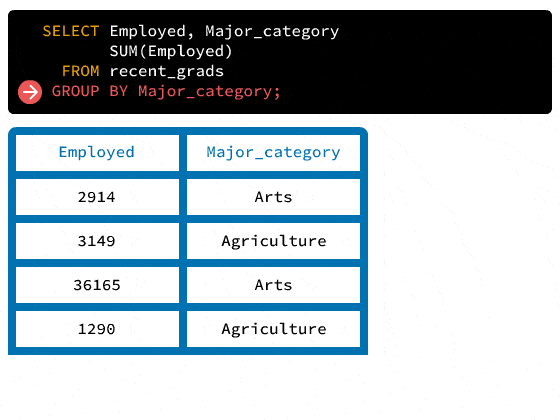

In [6]:
from IPython.display import Image
Image(filename='5.1-group.gif')

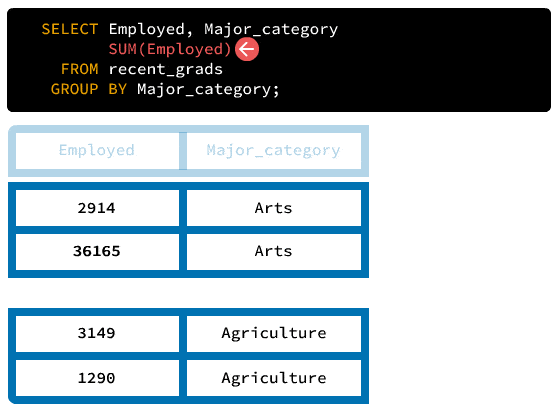

In [7]:
from IPython.display import Image
Image(filename='5.2-sum.gif')

## TODO:
* Write a SQL query that, for each major category, displays:
  * The major category
  * The average share of women with the alias Average_women.

In [8]:
%%sql

SELECT Major_category,AVG(ShareWomen) AS Average_women
FROM recent_grads
GROUP BY Major_category

 * sqlite:///jobs.db
Done.


Major_category,Average_women
Agriculture & Natural Resources,0.6179384232
Arts,0.56185119575
Biology & Life Science,0.584518475857143
Business,0.4050631853076923
Communications & Journalism,0.64383484025
Computers & Mathematics,0.5127519954545455
Education,0.6749855163125
Engineering,0.2571578951034483
Health,0.6168565694166667
Humanities & Liberal Arts,0.6761934042


# 6. Multiple Summary Statistics by Group

Just like we were able to compute multiple summary statistics for the whole table in the last mission, we can also compute multiple summary statistics by groups.

## TODO:
* Write a query that, for each major category, displays in order:
  * The major category
  * The total amount of women with the alias Total_women
  * The average percentage of women with the alias Mean_women
  * The result of multiplying the total number of graduates by the average percentage of women with the alias Estimate_women.

In [9]:
%%sql

SELECT Major_category,SUM(Women) AS Total_women,AVG(ShareWomen) AS Mean_women,SUM(Total)*AVG(ShareWomen) AS Estimate_women
FROM recent_grads
GROUP BY Major_category

 * sqlite:///jobs.db
Done.


Major_category,Total_women,Mean_women,Estimate_women
Agriculture & Natural Resources,249812,0.6179384232,49423.333025959204
Arts,140469,0.56185119575,200653.91753819748
Biology & Life Science,578132,0.584518475857143,265290.7244894746
Business,110367,0.4050631853076923,527544.5710282911
Communications & Journalism,98278,0.64383484025,252770.20211699026
Computers & Mathematics,62599,0.5127519954545455,153316.94865687276
Education,612958,0.6749855163125,377403.9767502918
Engineering,118051,0.2571578951034483,138243.71272339704
Health,312026,0.6168565694166667,285746.4686508825
Humanities & Liberal Arts,349636,0.6761934042,482442.35570776556


# 7. Multiple Group Columns

## TODO:
* Write a query that, for each combination of Major_category and Sample_category, displays in order:

  * The major category
  * The sample category
  * The average percentage of women with the alias Mean_women
  * The sum total of graduates with the alias Total_graduates

In [10]:
%sql sqlite:///jobss.db

In [11]:
%%sql

SELECT Major_category,Sample_category,AVG(ShareWomen) AS Mean_women,SUM(Total) AS Total_graduates
FROM new_grads
GROUP BY Major_category,Sample_category

   sqlite:///jobs.db
 * sqlite:///jobss.db
Done.


Major_category,Sample_category,Mean_women,Total_graduates
Agriculture & Natural Resources,Medium,0.75257011,35813
Agriculture & Natural Resources,Small,0.5842805015,44168
Arts,Large,0.37435562299999997,103480
Arts,Medium,0.6070284135,217083
Arts,Small,0.5641134296666667,36567
Biology & Life Science,Large,0.601858152,280709
Biology & Life Science,Medium,0.584556133,25965
Biology & Life Science,Small,0.5830703647500001,147188
Business,Large,0.39816511960000006,1142867
Business,Medium,0.4335738126,130698


# 8. Querying Virtual Columns With the HAVING Statement

Sometimes we want to select a subset of rows after performing a GROUP BY query. On the last screen, for instance, we may have wanted to select only those rows where Mean_women is greater than .8.

We can't use the WHERE clause to do this:

**When we want to filter on a column generated by a GROUP BY query, we can use the HAVING statement.**

## TODO
Remember to use the new_grads table.

* Find all of the major categories where the share of graduates with low-wage jobs is greater than .1.
* Use the SELECT statement to select Major_category and AVG(Low_wage_jobs) / AVG(Total) as Share_low_wage
* Use the GROUP BY statement to group the query by the Major_category column.
* Use the HAVING statement to restrict the selection to rows where Share_low_wage is greater than .1.

In [12]:
%%sql

SELECT Major_category,AVG(Low_wage_jobs)/AVG(Total) AS Share_low_wage
FROM new_grads
GROUP BY Major_category
HAVING Share_low_wage>0.1

   sqlite:///jobs.db
 * sqlite:///jobss.db
Done.


Major_category,Share_low_wage
Arts,0.16833085991095678
Communications & Journalism,0.1263241815481876
Humanities & Liberal Arts,0.13208721344194835
Industrial Arts & Consumer Services,0.11571334076033978
Law & Public Policy,0.11568503743572278
Psychology & Social Work,0.11693384919554187
Social Science,0.10223297343603174


# 9. Order of Execution

We now learned a couple more clauses: GROUP BY and HAVING. We can expand our mental model of the general structure of a query:

* SELECT column(s)
* FROM some_table
* WHERE some_condition
* GROUP BY column(s)
* HAVING some_condition
* ORDER BY column(s)
* LIMIT some_limit;

And the order by which SQL runs this is:

`FROM
WHERE
GROUP BY
HAVING
SELECT
ORDER BY
LIMIT`

# 10. Rounding Results With the ROUND() Function

By passing different values into the ROUND function, such as ROUND(ShareWomen, 3), we can round to different decimal places.

## TODO:
Write a query with the following features:
* Displays, in this order:
* ShareWomen rounded to 4 decimal places with the alias Rounded_women
* Major_category
* Displays only the first ten results resulting from the above

In [13]:
%%sql

SELECT ROUND(ShareWomen,4) Rounded_women,Major_category
FROM new_grads
LIMIT 10;

   sqlite:///jobs.db
 * sqlite:///jobss.db
Done.


Rounded_women,Major_category
0.1206,Engineering
0.1019,Engineering
0.153,Engineering
0.1073,Engineering
0.3416,Engineering
0.145,Engineering
0.5357,Business
0.4414,Physical Sciences
0.1398,Engineering
0.4378,Engineering


# 11. Nesting functions

## TODO:
Write a query that:
* Aggregates by the major's category
* Displays in order:
  * The major's category
  * The ratio AVG(College_jobs) / AVG(Total) rounded to three decimal places with the alias Share_degree_jobs
  * Only keeps the rows where Share_degree_jobs is less than .3

In [14]:
%%sql

SELECT Major_category,ROUND(AVG(College_jobs)/AVG(Total), 3) Share_degree_jobs
FROM recent_grads
GROUP BY Major_category 
HAVING Share_degree_jobs <0.3;

   sqlite:///jobs.db
 * sqlite:///jobss.db
Done.


Major_category,Share_degree_jobs
Agriculture & Natural Resources,0.248
Arts,0.265
Business,0.114
Communications & Journalism,0.22
Humanities & Liberal Arts,0.27
Industrial Arts & Consumer Services,0.249
Law & Public Policy,0.163
Social Science,0.215


# 12. Casting


On the last few screens, we used SQL arithmetic to divide float (what we referred to as decimal numbers in the previous mission) columns. This resulted in float values that we could round using the ROUND() function.

If we try to divide two integer columns (Women and Total, for instance), SQLite (and most other SQL dialects) will round down and return integer values:

In [15]:
%%sql 

SELECT Women, Total,
       Women/Total SW
  FROM new_grads
 LIMIT 12;

   sqlite:///jobs.db
 * sqlite:///jobss.db
Done.


Women,Total,SW
282,2339,0
77,756,0
131,856,0
135,1258,0
11021,32260,0
373,2573,0
960,3777,0
1667,1792,0
2105,91227,0
6548,81527,0


Notice how everytime Women is smaller than Total the result 0 and when Women is larger, the result is 1. The ratio was rounded.

`To get float value, we can use the CAST() function to the transform the columns into Float type:`

## TODO:
Write a query that
* Divides the sum of the Women column by the sum of the Total column, aliased as SW and as float values.
* Group the results by Major_category and order by SW.
* Only contains the Major_category and SW columns, in that order.

In [16]:
%%sql

SELECT Major_category,CAST(SUM(Women) as Float)/CAST(SUM(Total) as Float) AS SW
FROM new_grads
GROUP BY Major_category
ORDER BY SW

   sqlite:///jobs.db
 * sqlite:///jobss.db
Done.


Major_category,SW
Law & Public Policy,0.030585069260274586
Business,0.08474280852841269
Industrial Arts & Consumer Services,0.16024926890405236
Computers & Mathematics,0.20935560252568494
Engineering,0.2195958577559186
Communications & Journalism,0.25032539397505355
Arts,0.39332735978495226
Humanities & Liberal Arts,0.490051410855147
Health,0.6735876346523325
Interdisciplinary,0.8009108653220559


In this mission, we covered the CASE, GROUP BY and HAVING clauses. We can use these to quickly calculate powerful summary statistics in SQL and program if/then logic